In [1]:
from matplotlib import pyplot
import numpy as np
from math import log, exp

In [ ]:
x_max = 10
t_max = 100

x_steps = 10
t_steps = 10000
   
dx = x_max / x_steps
dt = t_max / t_steps

def Ut0(t):
    return t / 50

def U0x(x):
    return max(0, (x - 5)*(10 - x))

def f(x):
    return -20

def V(x):
    return 11 - x

0.01 1.0


In [3]:
def solve_with_bottom_right():
    result = [[0 for _ in range(x_steps + 1)] for _ in range(t_steps + 1)]
    for t_index in range(t_steps + 1):
        for x_index in range(x_steps + 1):
            t = t_index * dt
            x = x_index * dx
            u = 0
            if t_index == 0:
                u = U0x(x)
            elif x_index == 0:
                u = Ut0(t)
            else:
                u = result[t_index - 1][x_index] - dt * V(x) * (result[t_index - 1][x_index] - result[t_index - 1][x_index - 1]) / dx + dt * f(x)

            result[t_index][x_index] = u

    return result

In [4]:
def calculate_standart_deviation(first, second):
    count = len(first) * len(first[0])
    summ = 0
    for i in range(len(first)):
        for j in range(len(first[0])):
            summ += (first[i][j] - second[i][j])**2
    
    return summ/count


In [13]:
def U(t, x):
    theta = log(11-x) + t
    if(theta > log(11)):
        return -20*t + 1001/50 * (theta) - 1001/50 * log(11)
    else:
        return -20*t + max(0, -(exp(theta) - 6)*(exp(theta)-1))
    

In [6]:
def solve_analitically():
    result = [[0 for _ in range(x_steps + 1)] for _ in range(t_steps + 1)]
    for t_index in range(t_steps + 1):
        for x_index in range(x_steps + 1):
            t = t_index * dt
            x = x_index * dx
            result[t_index][x_index] = U(t, x)
            
    return result



In [7]:
def solve_with_top_right():
    result = [[0 for _ in range(x_steps + 1)] for _ in range(t_steps + 1)]
    for t_index in range(t_steps + 1):
        for x_index in range(x_steps + 1):
            t = t_index * dt
            x = x_index * dx
            u = 0
            if t_index == 0:
                u = U0x(x)
            elif x_index == 0:
                u = Ut0(t)
            else:
                u = dx/(dx + dt*V(x)) * (dt*f(x) + dt*V(x)/dx * result[t_index][x_index-1] + result[t_index-1][x_index])
                
            result[t_index][x_index] = u

    return result

In [8]:
def show_plot(t, x, u, title = ""):
    u = np.array(u)
    t, x = np.meshgrid(x, t)
    fig = pyplot.figure()
    ax = fig.add_subplot(projection='3d')
    plot = ax.plot_surface(t, x, u)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel("U")
    ax.view_init(elev=30, azim=45, roll=15)
    ax.set_title(title)
    pyplot.show()
    

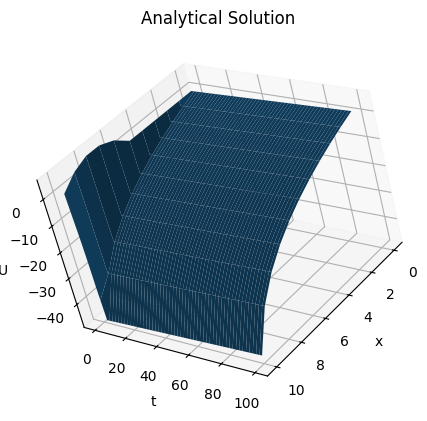

In [9]:
real_solution = solve_analitically()
t = np.linspace(0, t_max, t_steps + 1)
x = np.linspace(0, x_max, x_steps + 1)
show_plot(t, x, real_solution   , "Analytical Solution")

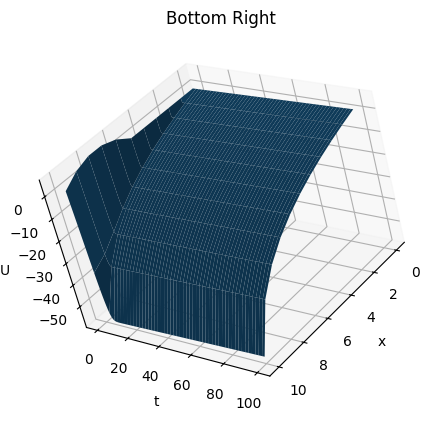

Standart deviation: 12.703313816535458


In [10]:
u = solve_with_bottom_right()
t = np.linspace(0, t_max, t_steps + 1)
x = np.linspace(0, x_max, x_steps + 1)
show_plot(t, x, u, "Bottom Right")
print("Standart deviation:", calculate_standart_deviation(u, real_solution))

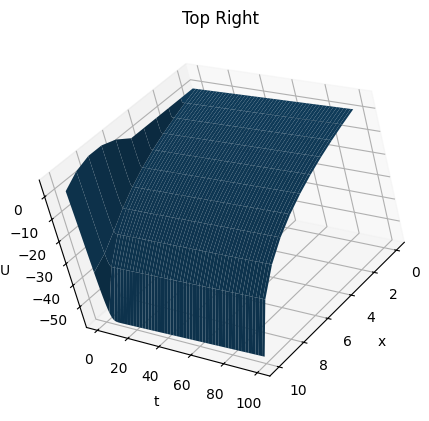

Standart deviation: 12.702071802123223


In [11]:
u = solve_with_top_right()
t = np.linspace(0, t_max, t_steps + 1)
x = np.linspace(0, x_max, x_steps + 1)
show_plot(t, x, u, "Top Right")
print("Standart deviation:", calculate_standart_deviation(u, real_solution))